In [2]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../../data/sentiment_analysis_predictions/by_day/GME.csv", parse_dates=["created_at"])
df.set_index("created_at", drop=True, inplace=True)

In [4]:
data = yf.download("GME", start="2021-05-02", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,177.490005,177.490005,159.610001,162.199997,162.199997,5261000
2021-05-04,159.000000,161.490005,151.800003,160.729996,160.729996,4007500
2021-05-05,161.830002,165.500000,158.330002,159.479996,159.479996,2805400
2021-05-06,160.860001,164.720001,155.600006,161.009995,161.009995,2942800
2021-05-07,160.110001,167.410004,157.500000,161.110001,161.110001,2934600
...,...,...,...,...,...,...
2022-04-25,135.410004,139.710007,133.279999,135.949997,135.949997,1534800
2022-04-26,135.639999,136.800003,126.160004,127.599998,127.599998,1545700
2022-04-27,127.269997,132.679993,124.580002,129.839996,129.839996,1305900


In [6]:
df_merged = pd.merge(df,data, how='inner', left_index=True, right_index=True)

In [7]:
#df_merged["prev_adj_close"] = df_merged["Adj Close"].shift(1)

## 3. Calculating Returns

In [8]:
# Return in percent
df_merged["return"] = df_merged["Adj Close"].pct_change()

In [9]:
df_merged["log_return"] = np.log(df_merged["Adj Close"]) - np.log(df_merged["Adj Close"].shift(1))

In [10]:
df_merged["log_return_shift"] = df_merged["log_return"].shift(-1)

In [11]:
df_merged["pos_minus_neg_diff"] = df_merged["pos_minus_neg"].diff(1)

In [12]:
df_merged["count_diff"] = df_merged["count"].diff(1)

In [13]:
df_merged.dropna(inplace=True)

In [14]:
df_merged

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count,Open,High,Low,Close,Adj Close,Volume,return,log_return,log_return_shift,pos_minus_neg_diff,count_diff
2021-05-04,0.271763,0.360857,0.367380,499,0.095617,47.712727,159.000000,161.490005,151.800003,160.729996,160.729996,4007500,-0.009063,-0.009104,-0.007807,-0.068648,3.0
2021-05-05,0.229515,0.447798,0.322687,820,0.093173,76.401538,161.830002,165.500000,158.330002,159.479996,159.479996,2805400,-0.007777,-0.007807,0.009548,-0.002444,321.0
2021-05-06,0.201018,0.429720,0.369262,1647,0.168243,277.096813,160.860001,164.720001,155.600006,161.009995,161.009995,2942800,0.009594,0.009548,0.000621,0.075071,827.0
2021-05-07,0.200771,0.395441,0.403788,734,0.203017,149.014766,160.110001,167.410004,157.500000,161.110001,161.110001,2934600,0.000621,0.000621,-0.117705,0.034774,-913.0
2021-05-10,0.290007,0.379028,0.330965,756,0.040958,30.964170,161.309998,161.589996,143.000000,143.220001,143.220001,4806700,-0.111042,-0.117705,0.025506,-0.162059,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,0.259425,0.387646,0.352929,166,0.093503,15.521564,142.550003,146.300003,135.550003,138.220001,138.220001,1569600,-0.023594,-0.023877,-0.016559,0.026664,2.0
2022-04-25,0.251789,0.407347,0.340865,226,0.089076,20.131230,135.410004,139.710007,133.279999,135.949997,135.949997,1534800,-0.016423,-0.016559,-0.063387,-0.004427,60.0
2022-04-26,0.341325,0.328281,0.330394,198,-0.010931,-2.164416,135.639999,136.800003,126.160004,127.599998,127.599998,1545700,-0.061420,-0.063387,0.017403,-0.100008,-28.0
2022-04-27,0.228449,0.414548,0.357003,245,0.128553,31.495606,127.269997,132.679993,124.580002,129.839996,129.839996,1305900,0.017555,0.017403,-0.004090,0.139485,47.0


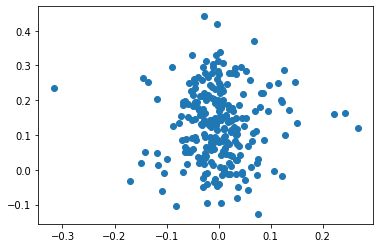

In [15]:
plt.scatter(df_merged["log_return_shift"], df_merged["pos_minus_neg"])
plt.show()

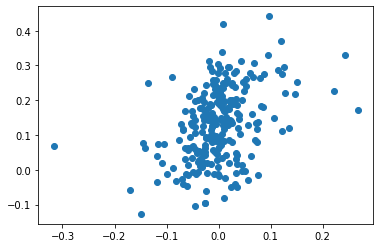

In [16]:
plt.scatter(df_merged["log_return"], df_merged["pos_minus_neg"])
plt.show()

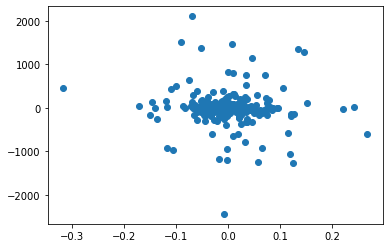

In [17]:
plt.scatter(df_merged["log_return_shift"], df_merged["count_diff"])
plt.show()

In [18]:
pos_minus_neg_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg"])
pos_minus_neg_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg"])

count_log_return = stats.pearsonr(df_merged["log_return"], df_merged["count"])
count_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["count"])

pos_minus_neg_times_count_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_times_count"])
pos_minus_neg_times_count_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_times_count"])

Positive_log_return = stats.pearsonr(df_merged["log_return"], df_merged["Positive"])
Positive_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["Positive"])

Negative_log_return = stats.pearsonr(df_merged["log_return"], df_merged["Negative"])
Negative_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["Negative"])

pos_minus_neg_diff_log_return = stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_diff"])
pos_minus_neg_diff_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_diff"])

count_diff_log_return = stats.pearsonr(df_merged["log_return"], df_merged["count_diff"])
count_diff_log_return_shift = stats.pearsonr(df_merged["log_return_shift"], df_merged["count_diff"])

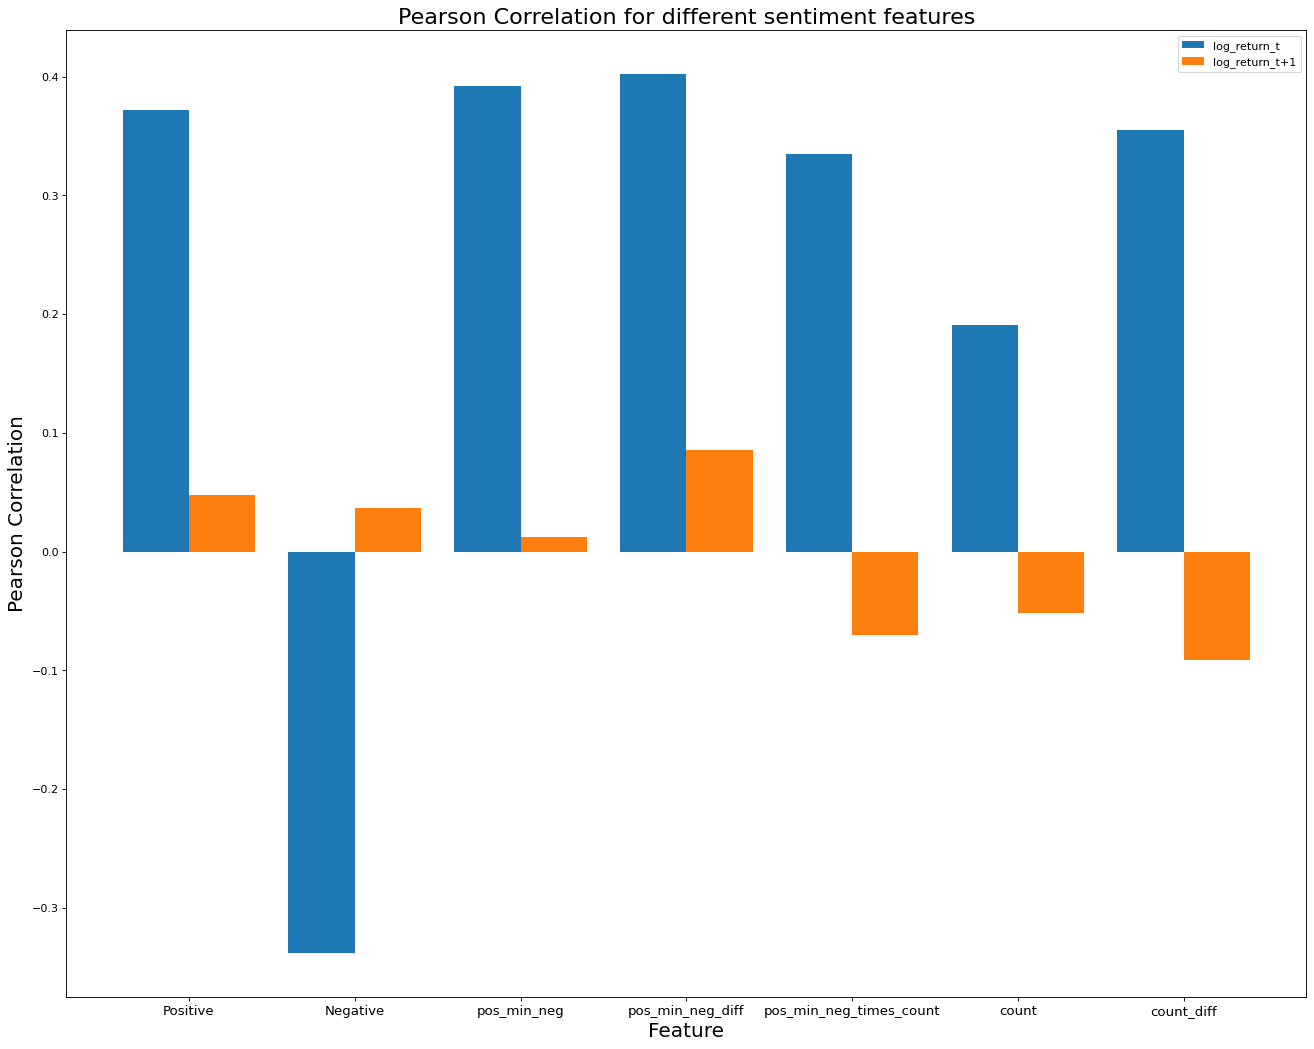

In [19]:
plt.figure(figsize=(20, 16), dpi=80)

X = ['Positive','Negative','pos_min_neg','pos_min_neg_diff', "pos_min_neg_times_count", "count", "count_diff"]
Y_log_return= [Positive_log_return[0],Negative_log_return[0],pos_minus_neg_log_return[0],pos_minus_neg_diff_log_return[0], pos_minus_neg_times_count_log_return[0], count_log_return[0], count_diff_log_return[0]]
Z_log_return_shift = [Positive_log_return_shift[0],Negative_log_return_shift[0],pos_minus_neg_log_return_shift[0],pos_minus_neg_diff_log_return_shift[0], pos_minus_neg_times_count_log_return_shift[0], count_log_return_shift[0], count_diff_log_return_shift[0]]

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2, Y_log_return, 0.4,  label = 'log_return_t')
plt.bar(X_axis +0.2, Z_log_return_shift, 0.4, label = 'log_return_t+1')

plt.xticks(X_axis, X, size=12)
plt.xlabel("Feature", size=18)
plt.ylabel("Pearson Correlation", size=18)
plt.title("Pearson Correlation for different sentiment features", size=20)
plt.legend()
plt.show()

In [20]:
df_excel = pd.DataFrame(data={"Feature": X, "Log_return_t": Y_log_return, "Log_return_t+1": Z_log_return_shift})

In [21]:
df_excel.to_excel("corr_results_GME.xlsx")

In [22]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Feature         7 non-null      object 
 1   Log_return_t    7 non-null      float64
 2   Log_return_t+1  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes


<AxesSubplot:>

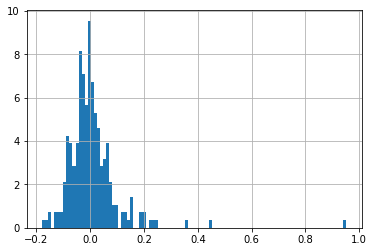

In [14]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=df_excel)

## 4. Descriptive and inferential statistics

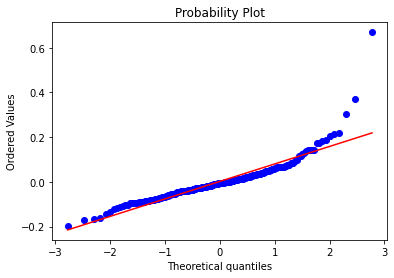

In [15]:
stats.probplot(df_merged["log_return"].dropna(), dist="norm", plot=plt)
plt.show()

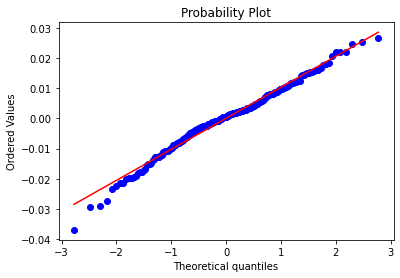

In [68]:
stats.probplot(df_merged["return"].dropna(), dist="norm", plot=plt)
plt.show()

In [60]:
np.e**1.38629

3.999982555558476

<AxesSubplot:>

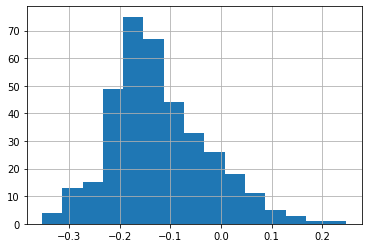

In [12]:
df["pos_minus_neg"].hist(bins=15, )